# Chapter 1 Exercise Solutions

## Exercise 1.1

(a)

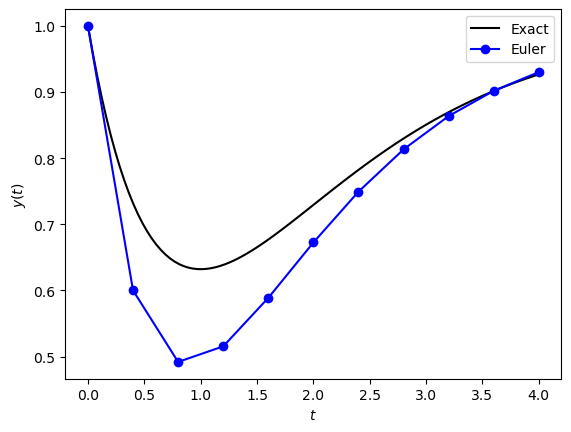

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define Euler method function
def euler(f, tspan, y0, h):
    
    m = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, m))
        
    t[0] = tspan[0]
    y[0,:] = y0
    
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h

    return t, y


# Define ODE function
def f(t, y):
    return 1 - np.exp(-t) - y


# Define IVP parameters
tspan = [0, 4]            # boundaries of the t domain
y0 = [1]                  # initial values
h = 0.4                   # step length

# Solve the IVP using the Euler method
t, y = euler(f, tspan, y0, h)

# Define exact solution
def exact(t):
    return 1 - t * np.exp(-t)

# Calculate exact solution over lots of values of t
texact = np.linspace(0, 4, 100)
yexact = exact(texact)

# Plot solution
fig, ax = plt.subplots()
plt.plot(texact, yexact, "k", label="Exact")
plt.plot(t, y[:,0], "b-o", label="Euler")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend()
plt.show()

(b)

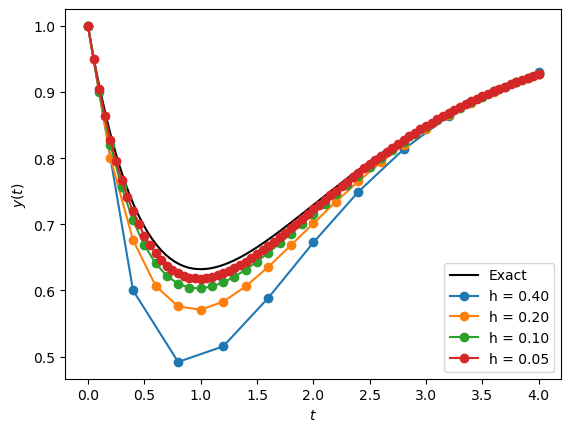

In [21]:
# Plot exact solution
fig, ax = plt.subplots()
plt.plot(texact, yexact, "k", label="Exact")

# Loop through h values and plot solution
hvals = [0.4, 0.2, 0.1, 0.05]
for h in hvals:
    t, y = euler(f, tspan, y0, h)
    plt.plot(t, y, '-o', label=f"h = {h:0.2f}")

plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend()
plt.show()

(c)

In [22]:

errors = []   # empty list for the errors

# Print column headings
print("|  h   |  Euler   |   GTE    |")
print("|:----:|:--------:|:--------:|")

# Loop through solutions
for h in hvals:
    t, y = euler(f, tspan, y0, h)
    idx = np.argmin(abs(t - 2))
    errors.append(abs(y[idx,0] - exact(t[idx])))
    print(f"| {h:0.2f} | {y[idx,0]:0.6f} | {errors[-1]:0.2e} |")

|  h   |  Euler   |   GTE    |
|:----:|:--------:|:--------:|
| 0.40 | 0.672496 | 5.68e-02 |
| 0.20 | 0.701442 | 2.79e-02 |
| 0.10 | 0.715579 | 1.38e-02 |
| 0.05 | 0.722507 | 6.82e-03 |


(d)

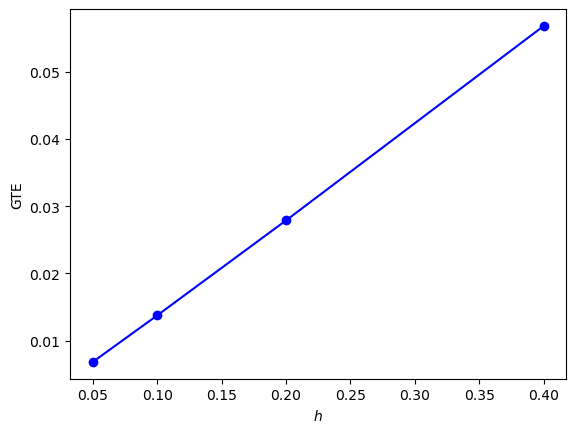

In [23]:
fig, ax = plt.subplots()
plt.plot(hvals, errors, "b-o")
plt.xlabel("$h$")
plt.ylabel("GTE")
plt.show()

---
## Exercise 1.2

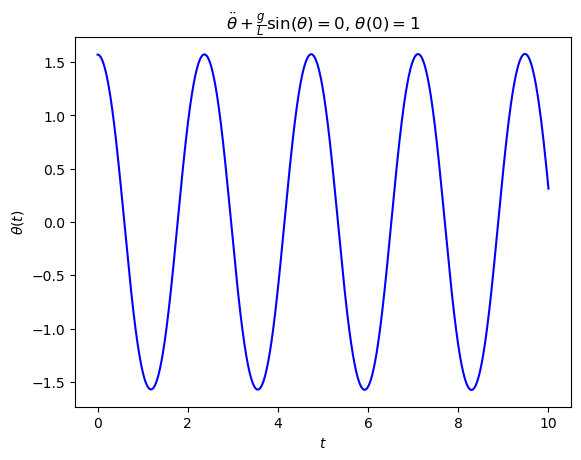

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define ODE function
def pendulum(t, y):
    return np.array([y[1], -g / L * np.sin(y[0])])


# Define IVP parameters
tspan = [0, 10]            # boundaries of the t domain
y0 = [np.pi / 2, 0]       # initial values
L = 1                     # length of pendulum
g = 9.81                  # gravity
h = 0.0001                # step length

# Solve the IVP using the Euler method
t, y = euler(pendulum, tspan, y0, h)


# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-", label="Euler")
plt.xlabel("$t$")
plt.ylabel("$\\theta(t)$")
plt.title("$\\ddot{\\theta} + \\frac{g}{L}\\sin(\\theta) = 0$, $\\theta(0) = 1$")
plt.show()

---
## Exercise 1.3

(a)

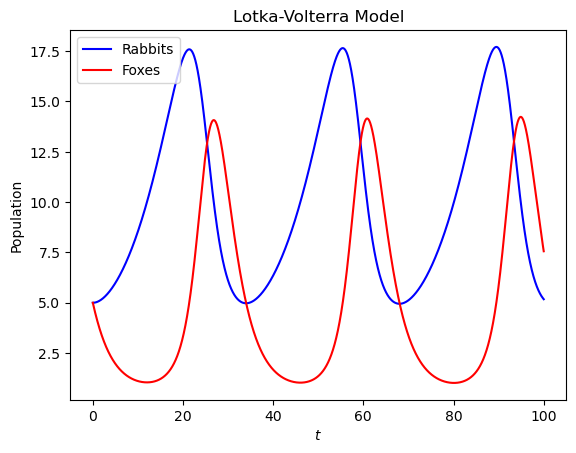

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define ODE function
def preditor_prey(t, y):
    return np.array([a * y[0] - b * y[0] * y[1], -c * y[1] + d * y[0] * y[1]])


# Define IVP parameters
tspan = [0, 100]          # boundaries of the t domain
y0 = [5, 5]               # initial values
a = 0.1                   # rabbit birth rate
b = 0.02                  # rabbit death rate
c = 0.4                   # fox birth rate
d = 0.04                  # fox death rate
h = 0.01                   # step length

# Solve the IVP using the Euler method
t, y = euler(preditor_prey, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-", label="Rabbits")
plt.plot(t, y[:,1], "r-", label="Foxes")
plt.xlabel("$t$")
plt.ylabel("Population")
plt.title("Lotka-Volterra Model")
plt.legend()
plt.show()

(b)

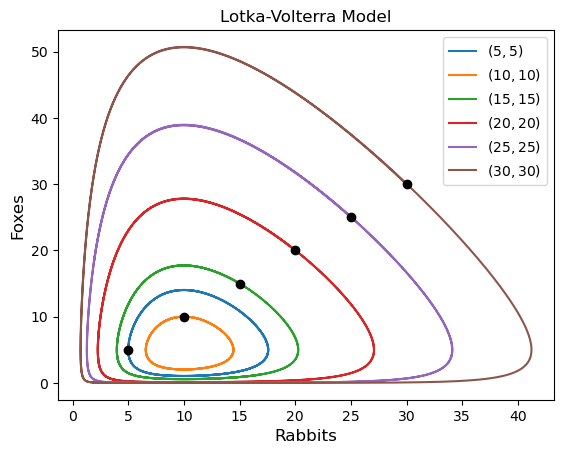

In [ ]:
# Use smaller step length to increase accuracy
h = 0.001

# Plot solution
fig, ax = plt.subplots()

for i in range(6):
    t, y = euler(preditor_prey, tspan, y0, h)
    plt.plot(y[:,0], y[:,1], label=f"$({y0[0]}, {y0[1]})$")
    plt.plot(y0[0], y0[1], 'ko')
    y0 += np.array([5, 5])
    
plt.legend()
plt.xlabel("Rabbits", fontsize=12)
plt.ylabel("Foxes", fontsize=12)
plt.title("Lotka-Volterra Model")
plt.show()